In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import model_from_json
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop


In [30]:
batch_size = 32
traindata_dir = 'DATA/train'
testdata_dir = 'DATA/train'

classes = ['daisy', 'rose', 'sunflower', 'dandelion']


In [31]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)


In [32]:
train_generator = train_datagen.flow_from_directory(
        traindata_dir,  
        target_size=(200, 200),  
        batch_size=batch_size,
        classes = classes,
        class_mode='categorical')

Found 2673 images belonging to 4 classes.


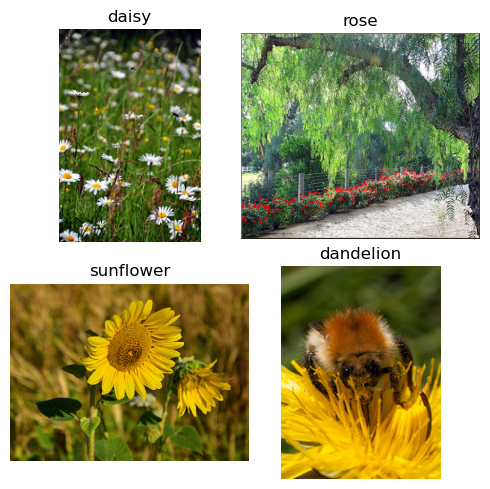

In [33]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt


class_files = {cls: [] for cls in classes}

for cls in classes:
    class_path = os.path.join(data_dir, cls)
    class_files[cls] = [os.path.join(class_path, file) for file in os.listdir(class_path) if file.endswith(('png', 'jpg', 'jpeg'))]

def display_random_images(class_files):
    plt.figure(figsize=(5, 5))
    for i, (cls, files) in enumerate(class_files.items()):
        random_image_path = random.choice(files)
        image = Image.open(random_image_path)
        plt.subplot(2, 2, i + 1)
        plt.imshow(image)
        plt.title(cls)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display random images
display_random_images(class_files)


In [34]:
test_generator = test_datagen.flow_from_directory(
        testdata_dir,  
        target_size=(200, 200),  
        batch_size=batch_size,
        classes = classes,
        class_mode='categorical')

Found 2673 images belonging to 4 classes.


In [35]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128),
    tf.keras.layers.LeakyReLU(alpha=0.01),  # Corrected Leaky ReLU activation
    tf.keras.layers.Dense(4, activation='softmax')
])


In [36]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [37]:
train_sample=train_generator.n
test_sample=test_generator.n
n_epochs = 3


In [38]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=int(train_sample/batch_size),  
    epochs=n_epochs,
    validation_data=test_generator,  # Include validation data
    validation_steps=int(test_sample/batch_size),  # Specify validation steps
    verbose=1
)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6544\3581630894.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/3
83/83 [==============================] - 158s 2s/step - loss: 1.2313 - acc: 0.4332 - val_loss: 1.0443 - val_acc: 0.5248
Epoch 2/3
83/83 [==============================] - 153s 2s/step - loss: 0.9861 - acc: 0.5926 - val_loss: 0.8250 - val_acc: 0.6871
Epoch 3/3
83/83 [==============================] - 152s 2s/step - loss: 0.8531 - acc: 0.6713 - val_loss: 0.7372 - val_acc: 0.7206


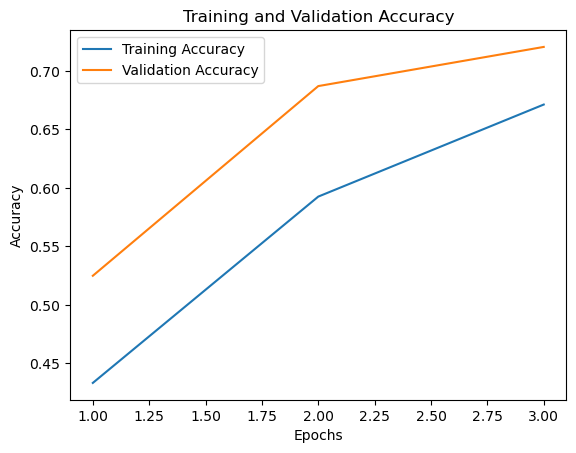

Final Training Accuracy: 0.6713365912437439
Final Validation Accuracy: 0.7206325531005859


In [41]:
import matplotlib.pyplot as plt

train_acc = history.history['acc']  # Change 'accuracy' to 'acc'
val_acc = history.history['val_acc']  # Change 'val_accuracy' to 'val_acc'

# Plot accuracy graph
plt.plot(range(1, n_epochs+1), train_acc, label='Training Accuracy')
plt.plot(range(1, n_epochs+1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Print final accuracy
print("Final Training Accuracy:", train_acc[-1])
print("Final Validation Accuracy:", val_acc[-1])


In [42]:
model.save('model.h5')


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:


import tensorflow as tf 
classifierLoad = tf.keras.models.load_model('model.h5')

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('daisy.jpg', target_size = (200,200))
test_image = np.expand_dims(test_image, axis=0)
result = classifierLoad.predict(test_image)
if result[0][1] == 1:
    print("ROSE")
elif result[0][0] == 1:
    print("DAISY")
elif result[0][2] == 1:
    print("SUNFLOWER")
elif result[0][3] == 1:
    print("DANDELION")

4
